In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(color_codes=True) #overide matplot libs ugly colours.
mpl.rcParams['figure.figsize'] = [13, 8] #default figure size


In [ ]:
df = pd.read_csv('./DayUse_Webscrape_DataFile.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    3043 non-null   int64  
 1   Date                          3043 non-null   object 
 2   Day_of_week                   3043 non-null   object 
 3   Hotel_name                    3043 non-null   object 
 4   Link                          3043 non-null   object 
 5   Stars                         3043 non-null   int64  
 6   Location                      3043 non-null   object 
 7   Current_price_HKD             3043 non-null   int64  
 8   Original_prices_HKD           3043 non-null   int64  
 9   Discount_percentage           3043 non-null   int64  
 10  Rating                        2447 non-null   float64
 11  Total_reviews                 2447 non-null   float64
 12  Wheelchair accessible rooms   3043 non-null   int64  
 13  Bus

In [13]:
df['Stars']= df['Stars'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    3043 non-null   int64  
 1   Date                          3043 non-null   object 
 2   Day_of_week                   3043 non-null   object 
 3   Hotel_name                    3043 non-null   object 
 4   Link                          3043 non-null   object 
 5   Stars                         3043 non-null   object 
 6   Location                      3043 non-null   object 
 7   Current_price_HKD             3043 non-null   int64  
 8   Original_prices_HKD           3043 non-null   int64  
 9   Discount_percentage           3043 non-null   int64  
 10  Rating                        2447 non-null   float64
 11  Total_reviews                 2447 non-null   float64
 12  Wheelchair accessible rooms   3043 non-null   int64  
 13  Bus

In [86]:
df

,Unnamed: 0,Date,Day_of_week,Hotel_name,Link,Stars,Location,Current_price_HKD,Original_prices_HKD,Discount_percentage,...,Spa,Elevator,Cleanliness,Check-in,Room Quality,Reception,Access,Value_for_money,Amenities,Tranquility
0,0,2021-11-06,Saturday,the kimberley hotel,https://en.dayuse.com.hk/hotels/hong-kong/the-...,4,Tsim Sha Tsui,450,900,50,...,0,1,4.3,4.3,4.3,4.4,4.3,4.4,4.2,4.2
1,1,2021-11-07,Sunday,the kimberley hotel,https://en.dayuse.com.hk/hotels/hong-kong/the-...,4,Tsim Sha Tsui,350,900,62,...,0,1,4.3,4.3,4.3,4.4,4.3,4.4,4.2,4.2
2,2,2021-11-08,Monday,the kimberley hotel,https://en.dayuse.com.hk/hotels/hong-kong/the-...,4,Tsim Sha Tsui,350,900,62,...,0,1,4.3,4.3,4.3,4.4,4.3,4.4,4.2,4.2
3,3,2021-11-09,Tuesday,the kimberley hotel,https://en.dayuse.com.hk/hotels/hong-kong/the-...,4,Tsim Sha Tsui,350,900,62,...,0,1,4.3,4.3,4.3,4.4,4.3,4.4,4.2,4.2
4,4,2021-11-10,Wednesday,the kimberley hotel,https://en.dayuse.com.hk/hotels/hong-kong/the-...,4,Tsim Sha Tsui,350,900,62,...,0,1,4.3,4.3,4.3,4.4,4.3,4.4,4.2,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,3038,2021-11-30,Tuesday,e hotel hong kong,https://en.dayuse.com.hk/hotels/hong-kong/e-ho...,3,Un Chau,500,600,17,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3039,3039,2021-12-01,Wednesday,e hotel hong kong,https://en.dayuse.com.hk/hotels/hong-kong/e-ho...,3,Un Chau,400,500,20,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3040,3040,2021-12-02,Thursday,e hotel hong kong,https://en.dayuse.com.hk/hotels/hong-kong/e-ho...,3,Un Chau,400,500,20,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3041,3041,2021-12-03,Friday,e hotel hong kong,https://en.dayuse.com.hk/hotels/hong-kong/e-ho...,3,Un Chau,400,500,20,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
plt.style.use('seaborn-white')

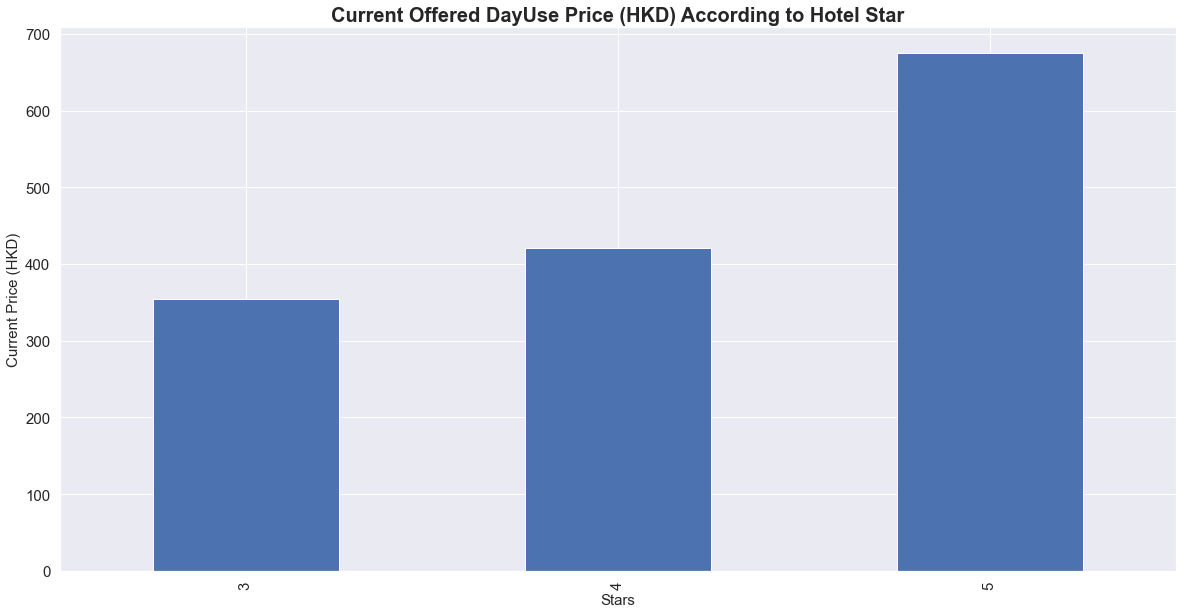

In [27]:
#Average Price of Hotel based on Star
fig, ax = plt.subplots(figsize=(20,10))
df.groupby('Stars')['Current_price_HKD'].mean().plot(kind = 'bar')
ax.set_title("Current Offered DayUse Price (HKD) According to Hotel Star", fontsize = 20, fontweight = 'bold')
ax.set_ylabel("Current Price (HKD)", fontsize=15)
ax.xaxis.label.set_size(15)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)


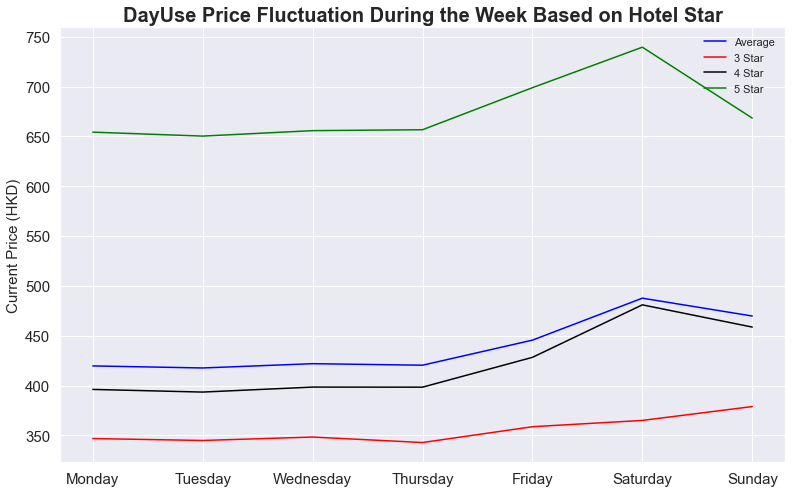

In [138]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Average = df.groupby('Day_of_week')['Current_price_HKD'].mean().reindex(day_order) 
Star_3 = df[df['Stars'] == '3'].groupby('Day_of_week')['Current_price_HKD'].mean().reindex(day_order) 
Star_4 = df[df['Stars'] == '4'].groupby('Day_of_week')['Current_price_HKD'].mean().reindex(day_order) 
Star_5 = df[df['Stars'] == '5'].groupby('Day_of_week')['Current_price_HKD'].mean().reindex(day_order) 

fig, ax = plt.subplots()

ax.plot(Average, color = 'blue', label = 'Average')
ax.plot(Star_3, color = 'red', label = '3 Star')
ax.plot(Star_4, color = 'black', label = '4 Star')
ax.plot(Star_5, color = 'Green', label = '5 Star')
ax.legend(loc = 'upper right')

ax.set_title("DayUse Price Fluctuation During the Week Based on Hotel Star", fontsize = 20, fontweight = 'bold')
ax.set_ylabel("Current Price (HKD)", fontsize=15)
ax.xaxis.label.set_size(15)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)

plt.show()


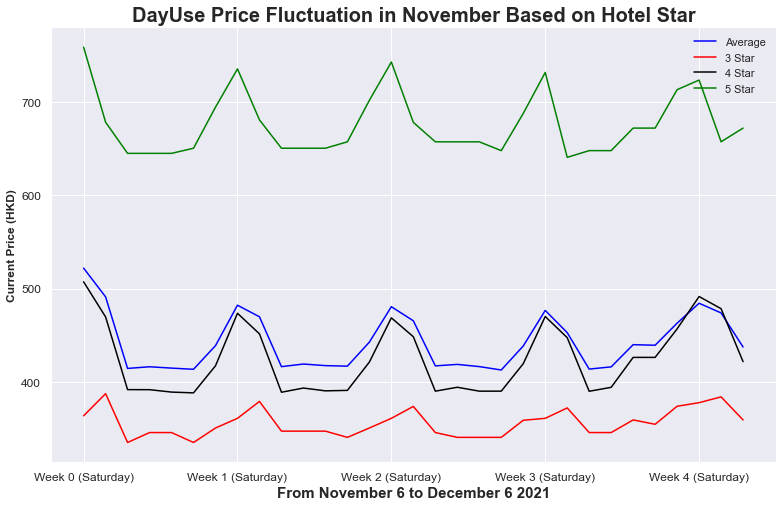

In [71]:
Average = df.groupby('Date')['Current_price_HKD'].mean()
Star_3 = df[df['Stars'] == '3'].groupby('Date')['Current_price_HKD'].mean()
Star_4 = df[df['Stars'] == '4'].groupby('Date')['Current_price_HKD'].mean()
Star_5 = df[df['Stars'] == '5'].groupby('Date')['Current_price_HKD'].mean()

fig, ax = plt.subplots()
ax.plot(Average, color = 'blue', label = 'Average')
ax.plot(Star_3, color = 'red', label = '3 Star')
ax.plot(Star_4, color = 'black', label = '4 Star')
ax.plot(Star_5, color = 'Green', label = '5 Star')
ax.legend(loc = 'upper right')

ax.set_title("DayUse Price Fluctuation in November Based on Hotel Star", fontsize = 20, fontweight = 'bold')
ax.set_ylabel("Current Price (HKD)", fontsize=12, fontweight = 'bold')
ax.set_xlabel("From November 6 to December 6 2021", fontsize=15, fontweight = 'bold')
ax.set_xticks([0,7,14,21,28])
ax.set_xticklabels(['Week 0 (Saturday)','Week 1 (Saturday)','Week 2 (Saturday)','Week 3 (Saturday)','Week 4 (Saturday)'])
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)

plt.show()


<ipython-input-139-44b86595b95b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Star_3 = df1[df['Stars'] == '3'].groupby('Day_of_week')['Current_price_HKD'].mean().reindex(day_order)
<ipython-input-139-44b86595b95b>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Star_4 = df1[df['Stars'] == '4'].groupby('Day_of_week')['Current_price_HKD'].mean().reindex(day_order)
<ipython-input-139-44b86595b95b>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Star_5 = df1[df['Stars'] == '5'].groupby('Day_of_week')['Current_price_HKD'].mean().reindex(day_order)


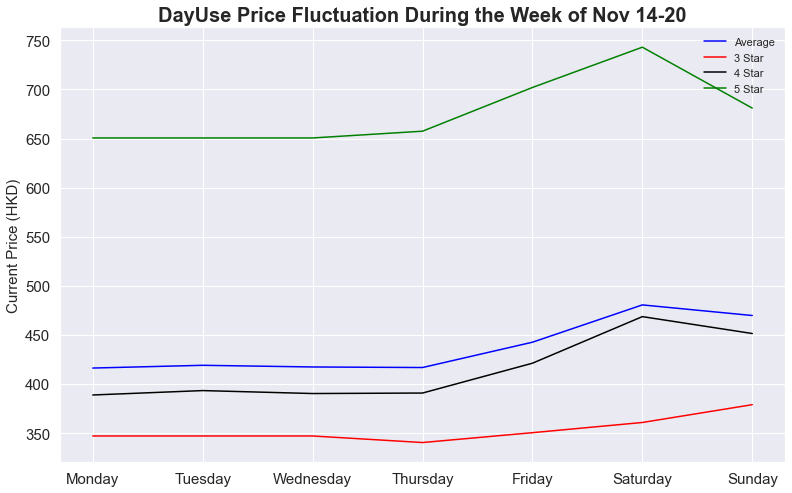

In [139]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

mask = (df['Date'] >= '2021-11-14') & (df['Date'] <= '2021-11-20')
df1 = df.loc[mask]
Average = df1.groupby('Day_of_week')['Current_price_HKD'].mean().reindex(day_order)
Star_3 = df1[df['Stars'] == '3'].groupby('Day_of_week')['Current_price_HKD'].mean().reindex(day_order)
Star_4 = df1[df['Stars'] == '4'].groupby('Day_of_week')['Current_price_HKD'].mean().reindex(day_order)
Star_5 = df1[df['Stars'] == '5'].groupby('Day_of_week')['Current_price_HKD'].mean().reindex(day_order)

fig, ax = plt.subplots()
ax.plot(Average, color = 'blue', label = 'Average')
ax.plot(Star_3, color = 'red', label = '3 Star')
ax.plot(Star_4, color = 'black', label = '4 Star')
ax.plot(Star_5, color = 'Green', label = '5 Star')
ax.legend(loc = 'upper right')

ax.set_title("DayUse Price Fluctuation During the Week of Nov 14-20", fontsize = 20, fontweight = 'bold')
ax.set_ylabel("Current Price (HKD)", fontsize=15)
ax.xaxis.label.set_size(15)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)

plt.show()

#How to organise the days?

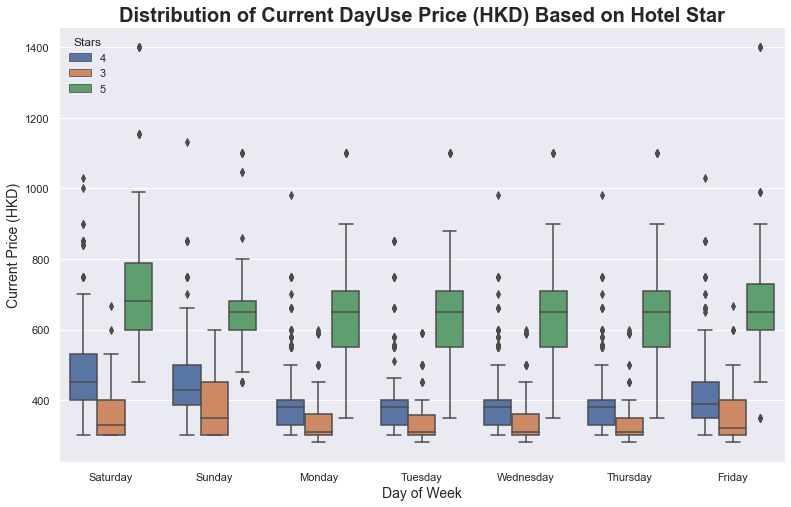

In [143]:

boxplot = sns.boxplot(data = df,x="Day_of_week",y="Current_price_HKD", hue="Stars")
boxplot.axes.set_title("Distribution of Current DayUse Price (HKD) Based on Hotel Star", fontsize=20 ,fontweight = 'bold')
boxplot.set_xlabel("Day of Week", fontsize = 14)
boxplot.set_ylabel("Current Price (HKD)", fontsize = 14)
plt.show()


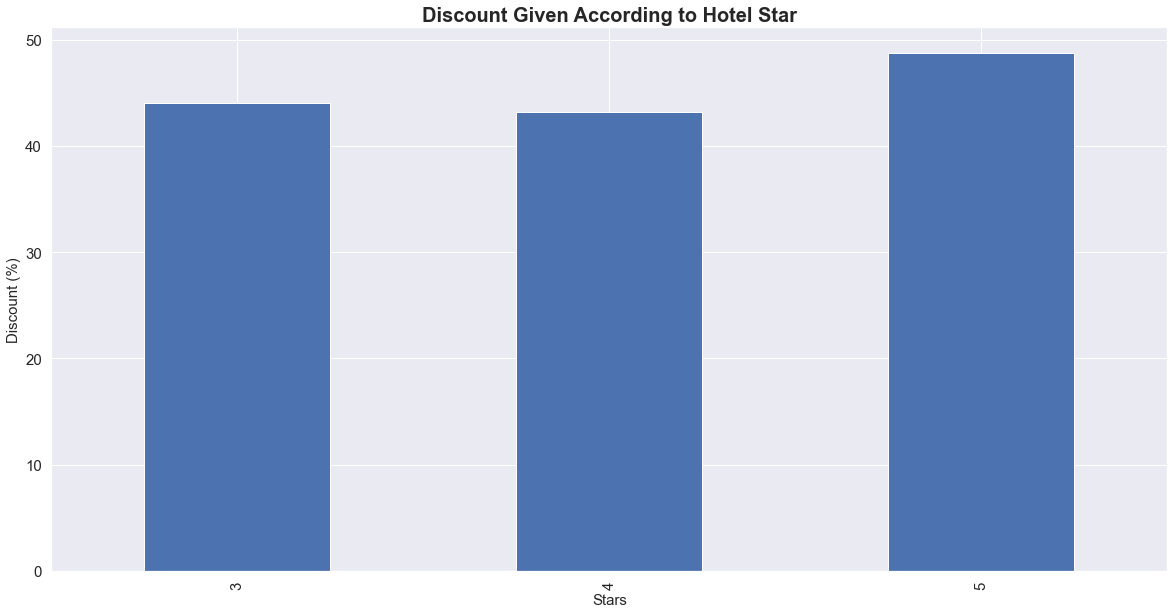

In [87]:
#Discounted Price
fig, ax = plt.subplots(figsize=(20,10))
df.groupby('Stars')['Discount_percentage'].mean().plot(kind = 'bar')
ax.set_title("Discount Given According to Hotel Star", fontsize = 20, fontweight = 'bold')
ax.set_ylabel("Discount (%)", fontsize=15)
ax.xaxis.label.set_size(15)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)

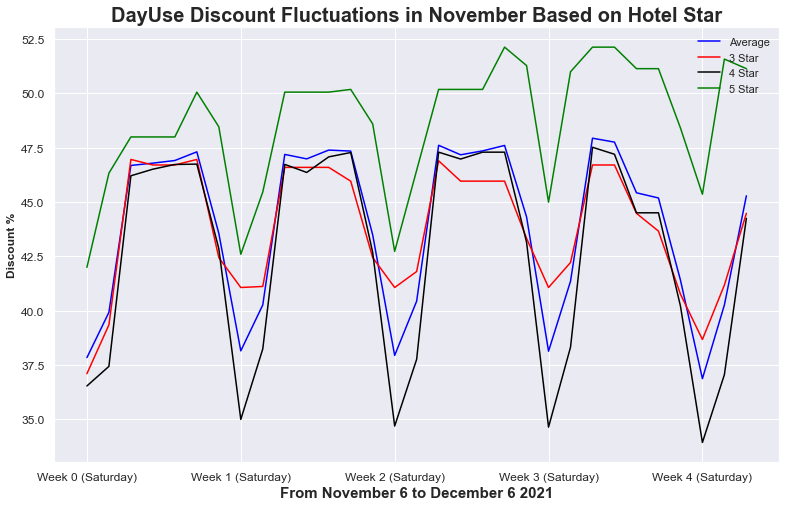

In [88]:

Average = df.groupby('Date')['Discount_percentage'].mean()
Star_3 = df[df['Stars'] == '3'].groupby('Date')['Discount_percentage'].mean()
Star_4 = df[df['Stars'] == '4'].groupby('Date')['Discount_percentage'].mean()
Star_5 = df[df['Stars'] == '5'].groupby('Date')['Discount_percentage'].mean()

fig, ax = plt.subplots()
ax.plot(Average, color = 'blue', label = 'Average')
ax.plot(Star_3, color = 'red', label = '3 Star')
ax.plot(Star_4, color = 'black', label = '4 Star')
ax.plot(Star_5, color = 'Green', label = '5 Star')
ax.legend(loc = 'upper right')

ax.set_title("DayUse Discount Fluctuations in November Based on Hotel Star", fontsize = 20, fontweight = 'bold')
ax.set_ylabel("Discount %", fontsize=12, fontweight = 'bold')
ax.set_xlabel("From November 6 to December 6 2021", fontsize=15, fontweight = 'bold')
ax.set_xticks([0,7,14,21,28])
ax.set_xticklabels(['Week 0 (Saturday)','Week 1 (Saturday)','Week 2 (Saturday)','Week 3 (Saturday)','Week 4 (Saturday)'])
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)

plt.show()

<ipython-input-140-c9ce9f81b87b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Star_3 = df1[df['Stars'] == '3'].groupby('Day_of_week')['Discount_percentage'].mean().reindex(day_order)
<ipython-input-140-c9ce9f81b87b>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Star_4 = df1[df['Stars'] == '4'].groupby('Day_of_week')['Discount_percentage'].mean().reindex(day_order)
<ipython-input-140-c9ce9f81b87b>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Star_5 = df1[df['Stars'] == '5'].groupby('Day_of_week')['Discount_percentage'].mean().reindex(day_order)


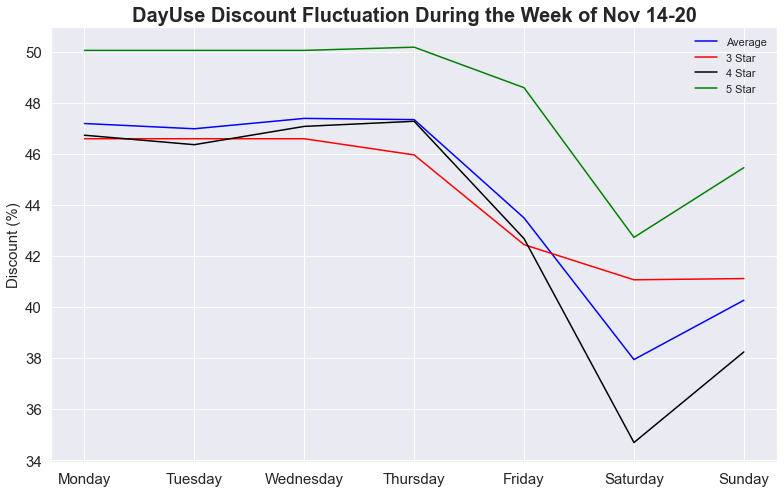

In [140]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

mask = (df['Date'] >= '2021-11-14') & (df['Date'] <= '2021-11-20')
df1 = df.loc[mask]
Average = df1.groupby('Day_of_week')['Discount_percentage'].mean().reindex(day_order)
Star_3 = df1[df['Stars'] == '3'].groupby('Day_of_week')['Discount_percentage'].mean().reindex(day_order)
Star_4 = df1[df['Stars'] == '4'].groupby('Day_of_week')['Discount_percentage'].mean().reindex(day_order)
Star_5 = df1[df['Stars'] == '5'].groupby('Day_of_week')['Discount_percentage'].mean().reindex(day_order)

fig, ax = plt.subplots()
ax.plot(Average, color = 'blue', label = 'Average')
ax.plot(Star_3, color = 'red', label = '3 Star')
ax.plot(Star_4, color = 'black', label = '4 Star')
ax.plot(Star_5, color = 'Green', label = '5 Star')
ax.legend(loc = 'upper right')

ax.set_title("DayUse Discount Fluctuation During the Week of Nov 14-20", fontsize = 20, fontweight = 'bold')
ax.set_ylabel("Discount (%)", fontsize=15)
ax.xaxis.label.set_size(15)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)

plt.show()

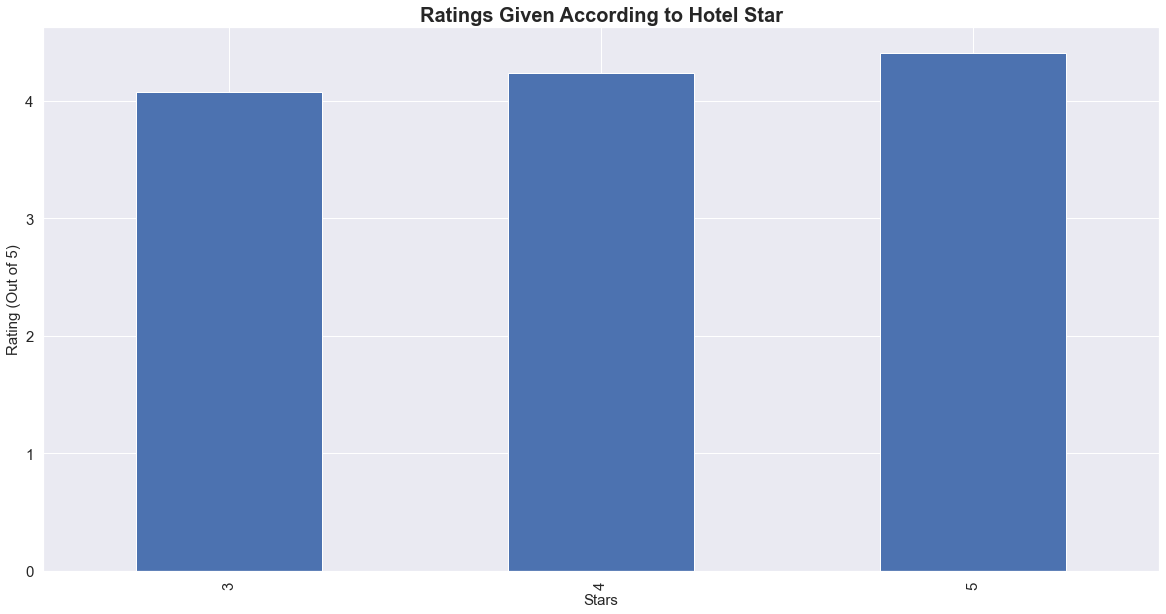

In [104]:
#Rating
fig, ax = plt.subplots(figsize=(20,10))
df.groupby('Stars')['Rating'].mean().plot(kind = 'bar')
ax.set_title("Ratings Given According to Hotel Star", fontsize = 20, fontweight = 'bold')
ax.set_ylabel("Rating (Out of 5)", fontsize=15)
ax.xaxis.label.set_size(15)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)

In [120]:
df_temp = df.sort_values('Hotel_name')
df_temp.drop_duplicates('Hotel_name',keep = 'first', inplace=True)
df_temp

,Unnamed: 0,Date,Day_of_week,Hotel_name,Link,Stars,Location,Current_price_HKD,Original_prices_HKD,Discount_percentage,...,Spa,Elevator,Cleanliness,Check-in,Room Quality,Reception,Access,Value_for_money,Amenities,Tranquility
2010,2010,2021-12-06,Monday,acesite knutsford hotel,https://en.dayuse.com.hk/hotels/hong-kong/aces...,3,Tsim Sha Tsui,300,800,63,...,0,1,3.5,4.0,3.0,2.5,3.0,4.5,3.0,3.5
2871,2871,2021-11-30,Tuesday,akvo hotel,https://en.dayuse.com.hk/hotels/hong-kong/akvo...,3,Sheung Wan,590,1400,58,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,352,2021-11-27,Saturday,alva hotel by royal,https://en.dayuse.com.hk/hotels/hong-kong/alva...,5,Sha Tin,480,900,47,...,0,1,4.6,4.3,4.5,4.4,4.2,4.0,4.3,4.3
1395,1395,2021-11-23,Tuesday,attitude on granville,https://en.dayuse.com.hk/hotels/hong-kong/atti...,4,Tsim Sha Tsui,300,1180,75,...,0,1,4.4,4.4,4.1,4.3,4.5,4.0,3.7,4.2
1849,1849,2021-11-21,Sunday,bishop lei international house,https://en.dayuse.com.hk/hotels/hong-kong/bish...,4,Mid-Levels,440,600,27,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2263,2021-11-19,Friday,xi hotel,https://en.dayuse.com.hk/hotels/hong-kong/xi-h...,3,Tsim Sha Tsui,450,600,25,...,0,1,4.3,4.3,4.5,3.8,4.8,4.5,4.3,4.3
2372,2372,2021-11-12,Friday,y loft,https://en.dayuse.com.hk/hotels/hong-kong/y-lo...,3,Chai Wan,400,800,50,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2732,2732,2021-12-05,Sunday,yha mei ho house,https://en.dayuse.com.hk/hotels/hong-kong/yha-...,3,Shek Kip Mei,330,1000,67,...,0,1,4.0,4.0,3.6,3.9,3.7,3.9,3.3,3.4
2987,2987,2021-12-03,Friday,yi serviced apartments,https://en.dayuse.com.hk/hotels/hong-kong/yi-s...,4,Tsim Sha Tsui,390,900,57,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


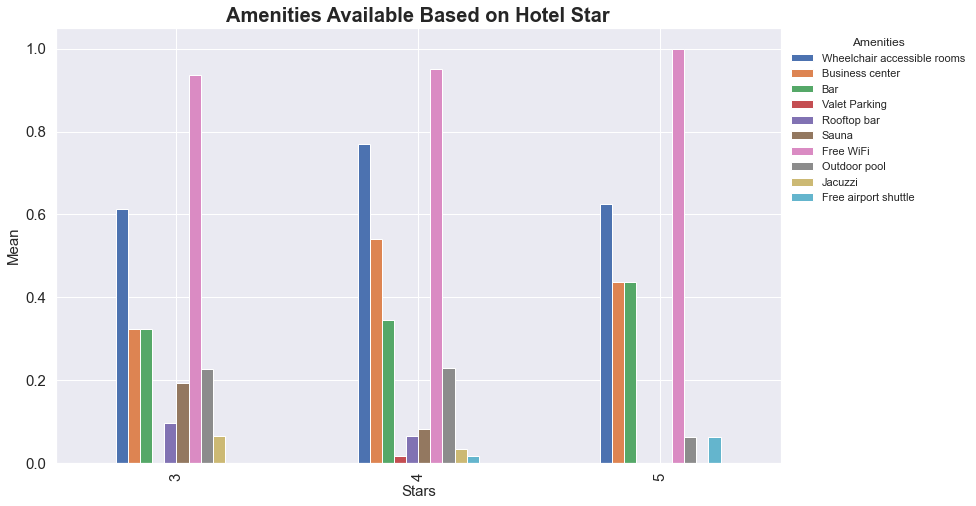

In [188]:
ax = df_temp.groupby(['Stars']).mean().plot(kind = 'bar', y = ['Wheelchair accessible rooms', 'Business center', 'Bar','Valet Parking','Rooftop bar','Sauna', 'Free WiFi','Outdoor pool','Jacuzzi','Free airport shuttle'])
ax.set_title("Amenities Available Based on Hotel Star", fontsize = 20, fontweight = 'bold')
ax.legend(title='Amenities', bbox_to_anchor=(1, 1), loc='upper left')

ax.set_ylabel("Mean", fontsize=15)
ax.xaxis.label.set_size(15)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)


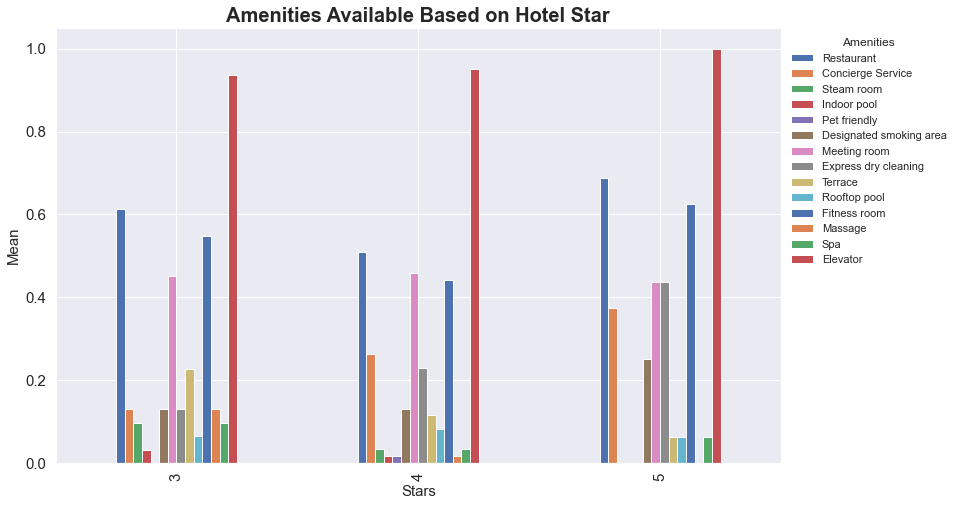

In [187]:
ax = df_temp.groupby(['Stars']).mean().plot(kind = 'bar', y = ['Restaurant','Concierge Service','Steam room','Indoor pool','Pet friendly','Designated smoking area','Meeting room','Express dry cleaning','Terrace','Rooftop pool','Fitness room','Massage','Spa', 'Elevator'])
ax.set_title("Amenities Available Based on Hotel Star", fontsize = 20, fontweight = 'bold')
ax.legend(title='Amenities', bbox_to_anchor=(1, 1), loc='upper left')

ax.set_ylabel("Mean", fontsize=15)
ax.xaxis.label.set_size(15)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)


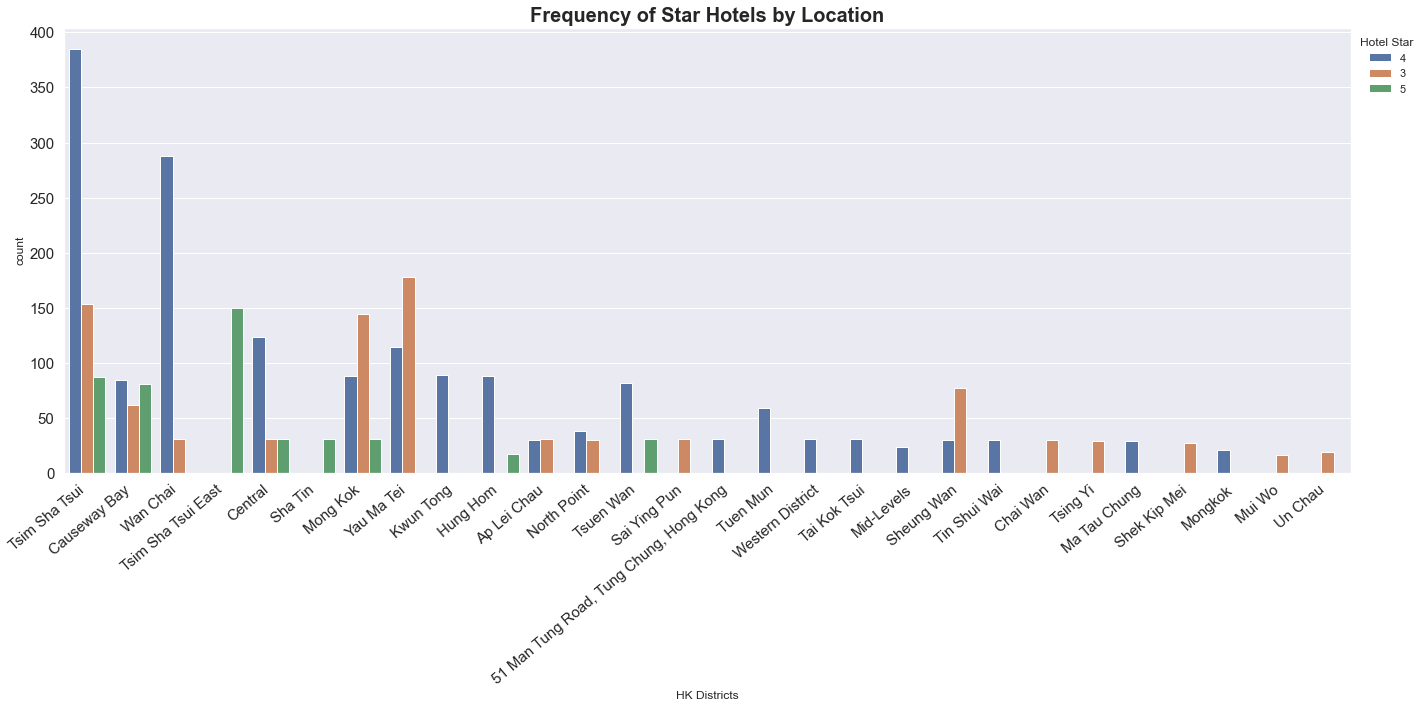

In [202]:
plt.figure(figsize=(20,10))
p = sns.countplot(data=df, x='Location', hue='Stars')
ax.set_ylabel("Frequency", fontsize=15)
p.legend(title='Hotel Star', bbox_to_anchor=(1, 1), loc='upper left')
p.set(xlabel='HK Districts')
p.set_title("Frequency of Star Hotels by Location", fontsize = 20, fontweight = 'bold')
p.set_xticklabels(p.get_xticklabels(), rotation=40, ha="right")
p.tick_params(axis='x',labelsize=15)
p.tick_params(axis='y',labelsize=15)
plt.tight_layout()
plt.show()

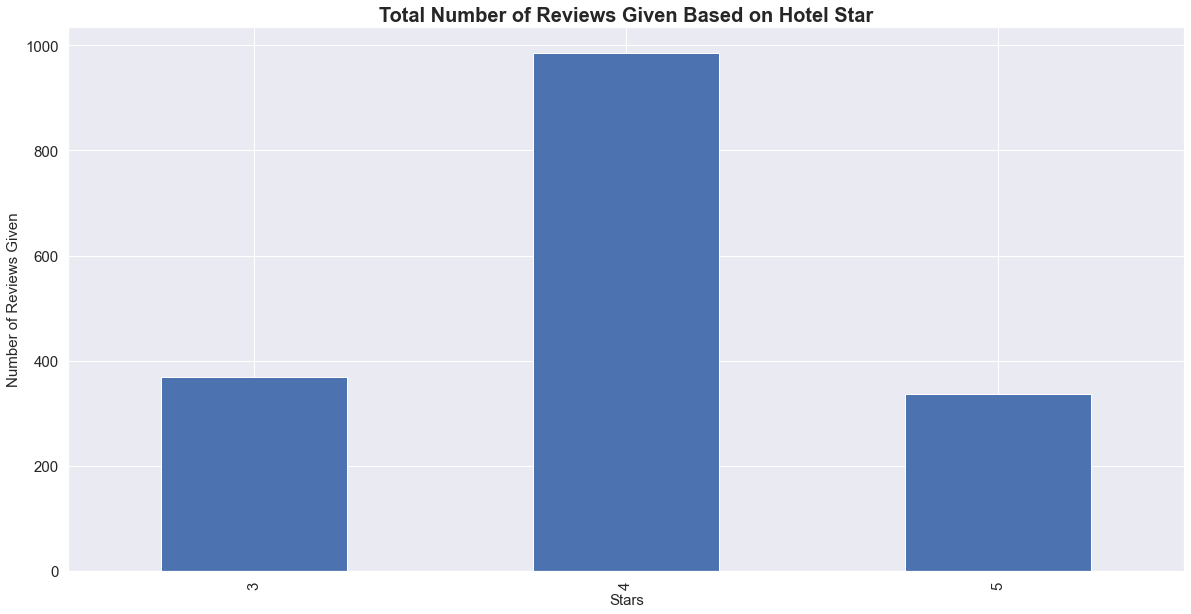

In [194]:
fig, ax = plt.subplots(figsize=(20,10))
ax = df_temp.groupby(['Stars'])['Total_reviews'].sum().plot(kind='bar')
ax.set_title("Total Number of Reviews Given Based on Hotel Star", fontsize = 20, fontweight = 'bold')
ax.set_ylabel("Number of Reviews Given", fontsize=15)
ax.xaxis.label.set_size(15)
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)

<Figure size 1440x720 with 0 Axes>

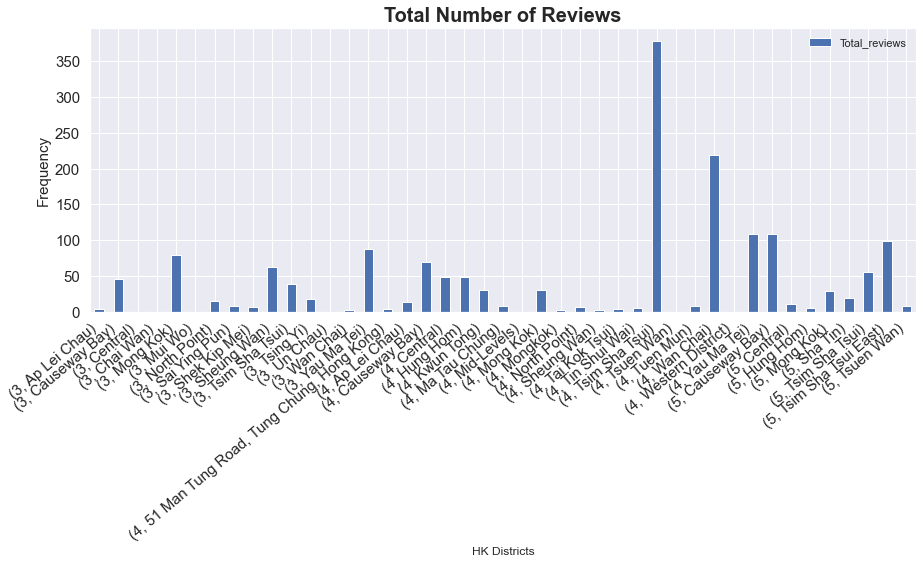

In [203]:
plt.figure(figsize=(20,10))
p = df_temp.groupby(['Stars','Location']).sum().plot(kind='bar',y='Total_reviews')
p.set_ylabel("Frequency", fontsize=15)
p.set(xlabel='HK Districts')
p.set_title("Total Number of Reviews", fontsize = 20, fontweight = 'bold')
p.set_xticklabels(p.get_xticklabels(), rotation=40, ha="right")
p.tick_params(axis='x',labelsize=15)
p.tick_params(axis='y',labelsize=15)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Stars'>

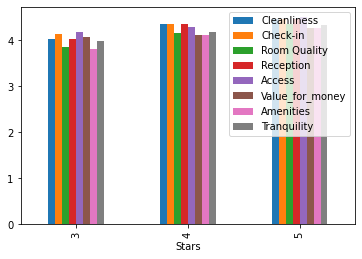

In [16]:
df.groupby(['Stars']).count().plot(kind = 'bar', y = ['Cleanliness','Check-in','Room Quality','Reception', 'Access', 'Value_for_money','Amenities','Tranquility'])
